<a href="https://colab.research.google.com/github/RimshaT1610/RimshaT1610/blob/main/HW_Assignment_Rimsha_Touqeer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

❓Predict House Prices Using a Neural Network

**Objective**:
Your task is to build a neural network to predict house prices based on features like:
1.	Number of bedrooms.
2.	Size of the house (square feet).
3.	Age of the house (years).



In [1]:
# Import dependencies
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
# Step 1: Load the dataset
from google.colab import files
uploaded = files.upload()  # Upload the Excel file (house_data.xlsx)


Saving house_data.xlsx to house_data.xlsx


In [3]:
# Load the Excel file into a DataFrame
df = pd.read_excel('house_data.xlsx')
print(df.head())  # Display the first few rows of the dataset


   bedrooms  size  age   price
0         4  1348   57  144096
1         3  4067   93  929638
2         4   595   57  562650
3         5  1187   21  253945
4         3  2526   73  161467


In [4]:
# Split the data into features (X) and target (y)
X = df[['bedrooms', 'size', 'age']].values
y = df['price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Step 2: Build the neural network
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(units=8, activation='relu', input_shape=[3]),  # Hidden layer with 8 neurons
#     tf.keras.layers.Dense(units=1)  # Output layer with 1 neuron
# ])

# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(units=16, activation='relu', input_shape=[3]),  # Increased from 8 to 16 neurons
#     tf.keras.layers.Dense(units=1)
# ])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=8, activation='relu', input_shape=[3]),  # First hidden layer
    tf.keras.layers.Dense(units=4, activation='relu'),  # Second hidden layer with 4 neurons
    tf.keras.layers.Dense(units=1)
])


In [12]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='mean_squared_error')


In [13]:
# Step 3: Train the model
history = model.fit(X_train, y_train, epochs=500, verbose=False)
print("Model training complete!")


Model training complete!


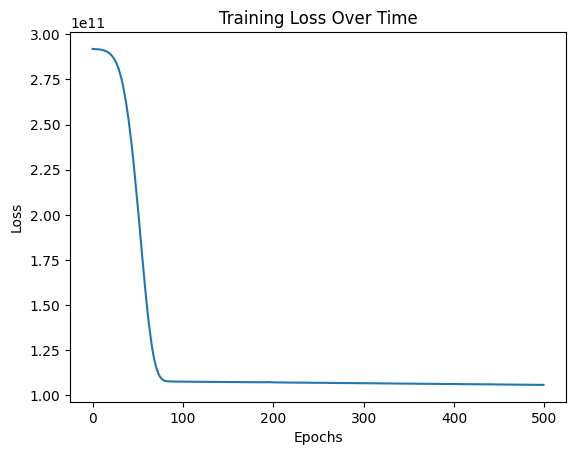

In [14]:
# Step 4: Evaluate the model
# Plot training loss
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.show()


In [15]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 163044966400.0000
Test Loss: 163044966400.0


In [16]:
# Test the model with new input
new_house = np.array([[3, 1500, 10]])  # Example: 3 bedrooms, 1500 sqft, 10 years old
predicted_price = model.predict(new_house)
print(f"Predicted Price for the house: ${predicted_price[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted Price for the house: $200930.70


**1.	How does the model’s performance change if you increase the number of neurons in the hidden layer to 16?**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, activation='relu', input_shape=[3]),  # Increased from 8 to 16 neurons
    tf.keras.layers.Dense(units=1)
])


If we increase the number of neurons in the hidden layer from 8 to 16, the model will have more capacity to learn complex patterns in the data.

Expected Effects:

✅ Better performance: The model may capture relationships
between features better.

✅ Lower training loss: It may reduce the error, leading to more accurate predictions.

⚠️ Risk of overfitting: If the dataset is small, the model may memorize the training data but fail on new data

**2.	What happens if you add a second hidden layer with 4 neurons? Does the loss decrease faster?**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=8, activation='relu', input_shape=[3]),  # First hidden layer
    tf.keras.layers.Dense(units=4, activation='relu'),  # Second hidden layer with 4 neurons
    tf.keras.layers.Dense(units=1)
])


If we add another hidden layer with 4 neurons, the network becomes deeper, which can help learn more abstract patterns.

Expected Effects:

✅ Better learning ability: The second layer can help break down relationships into smaller patterns.

✅ Faster loss reduction: A deeper network can sometimes reach lower loss in fewer epochs.

⚠️ Higher computational cost: More layers = more processing time.

⚠️ Diminishing returns: If the dataset is simple, a deeper network won’t necessarily improve performance.

**3.	Why is the Adam optimizer used in this assignment? What advantages does it offer over SGD?**

Adam is preferred in most deep learning problems because it converges faster and requires less tuning.


✅ Faster convergence: Learns faster and reaches a lower loss in fewer epochs.

✅ Adaptive learning rate: Adjusts the learning rate dynamically for each parameter, preventing overshooting.

✅ Works well with noisy data: More stable updates even if the dataset is not perfect.

✅ Momentum-based approach: Uses past gradients to smooth updates and avoid getting stuck in local minima.